## Assignment 1

### 1. I will be using the TESS dataset for this mini project.

In [14]:
#Modules
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

### Loading the Wav format Dataset

In [19]:
paths = []
labels = []
mfccs = []
import numpy as np
import scipy.fftpack

np.fft.dct = scipy.fftpack.dct  # Redirecting librosa's incorrect call


for dirname, _, filenames in os.walk('../../dataset/archive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        y , sr = librosa.load(os.path.join(dirname,filename), sr=None)
        mfcc = librosa.feature.mfcc(y=y ,sr=sr ,n_mfcc=13)
        mfcc_mean = np.mean(mfcc,axis=1)
        mfccs.append(mfcc_mean)
      
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df['mfcc'] = mfccs

df.head()

,speech,label,mfcc
0,../../dataset/archive/TESS Toronto emotional s...,angry,"[-390.03134, 55.23597, -15.03465, -10.704582, ..."
1,../../dataset/archive/TESS Toronto emotional s...,angry,"[-451.01947, 67.04883, -0.44825765, -16.81213,..."
2,../../dataset/archive/TESS Toronto emotional s...,angry,"[-406.56332, 28.609005, -5.3172164, 2.124631, ..."
3,../../dataset/archive/TESS Toronto emotional s...,angry,"[-386.34003, 53.439655, -8.663545, -13.309978,..."
4,../../dataset/archive/TESS Toronto emotional s...,angry,"[-404.78488, 54.462566, 3.3552904, 10.96758, 2..."


### Hello, Seaborn

In [20]:
summary_data = []

for file_path in df["speech"][:30]: 
    y, sr = librosa.load(file_path, sr=None)
    file_name = file_path.split("/")[-1]

    mean_amp = y.mean()
    max_amp = y.max()

    summary_data.append([file_name, mean_amp, max_amp])
df_summary = pd.DataFrame(summary_data, columns=["file", "mean_amplitude", "max_amplitude"])


### Line Charts

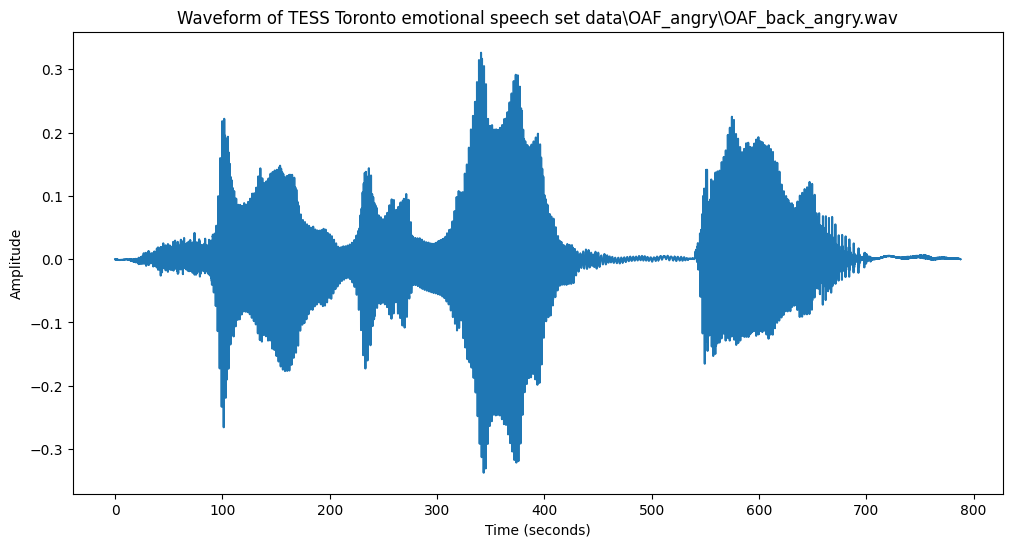

In [21]:
file_path = df["speech"].iloc[0] 
y, sr = librosa.load(file_path, sr=None)
time = librosa.times_like(y, sr=sr)  
df_wave = pd.DataFrame({"time": time, "amplitude": y})  

# Lineplot 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_wave, x="time", y="amplitude")
plt.title(f"Waveform of {file_path.split('/')[-1]}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

### Bar Charts and Heatmaps

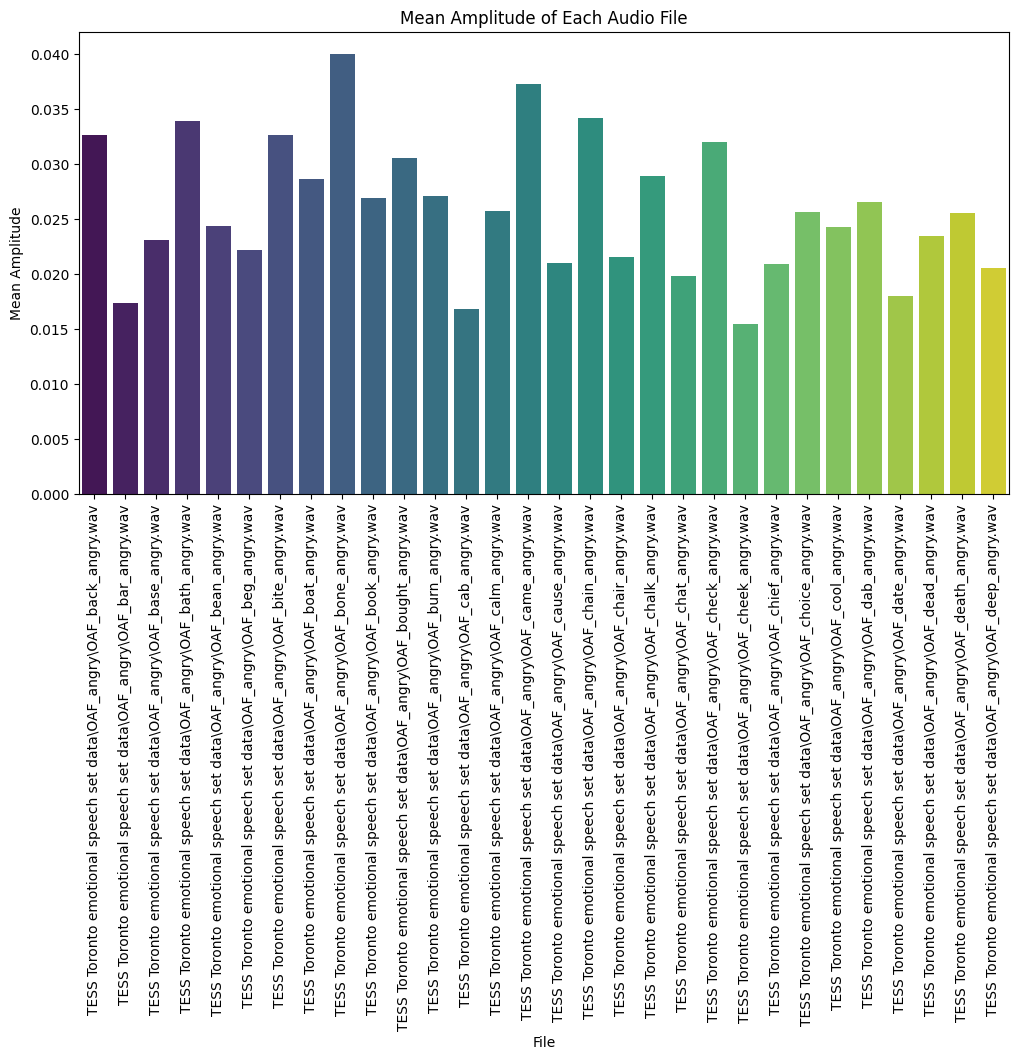

In [22]:
summary_data = []

for file_path in df["speech"][:30]: 
    y, sr = librosa.load(file_path, sr=None)
    file_name = file_path.split("/")[-1]

    mean_amp = abs(y).mean()  
    summary_data.append([file_name, mean_amp])

df_summary = pd.DataFrame(summary_data, columns=["file", "mean_amplitude"])

# Barplot of Mean Amplitude
plt.figure(figsize=(12, 6))
sns.barplot(data=df_summary, x="file", y="mean_amplitude", palette="viridis")
plt.xticks(rotation=90)
plt.title("Mean Amplitude of Each Audio File")
plt.xlabel("File")
plt.ylabel("Mean Amplitude")
plt.show()

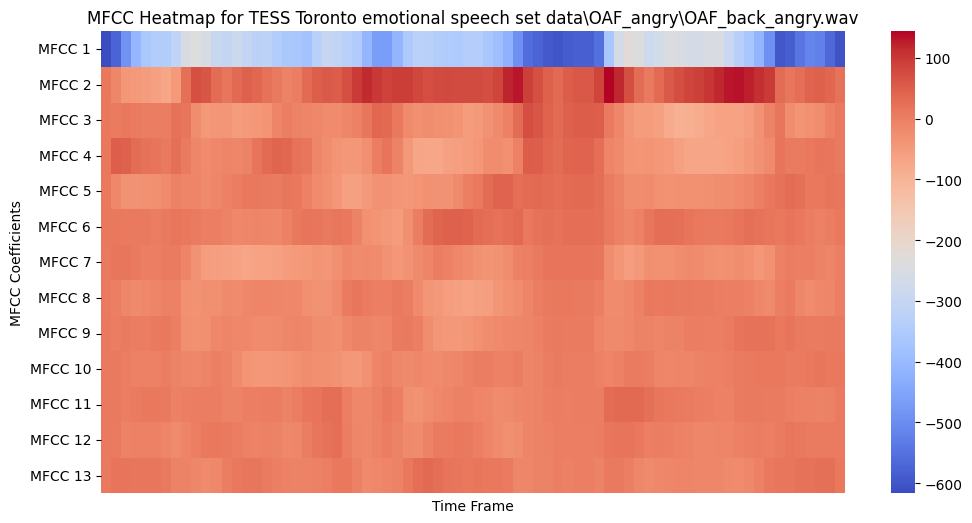

In [23]:
import librosa.display
import numpy as np

file_path = df["speech"].iloc[0]  
y, sr = librosa.load(file_path, sr=None)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  

# Heatmap of MFCC Feature
plt.figure(figsize=(12, 6))
sns.heatmap(mfcc, cmap="coolwarm", xticklabels=False, yticklabels=[f"MFCC {i}" for i in range(1, 14)])
plt.title(f"MFCC Heatmap for {file_path.split('/')[-1]}")
plt.xlabel("Time Frame")
plt.ylabel("MFCC Coefficients")
plt.show()


### Scatter Plots

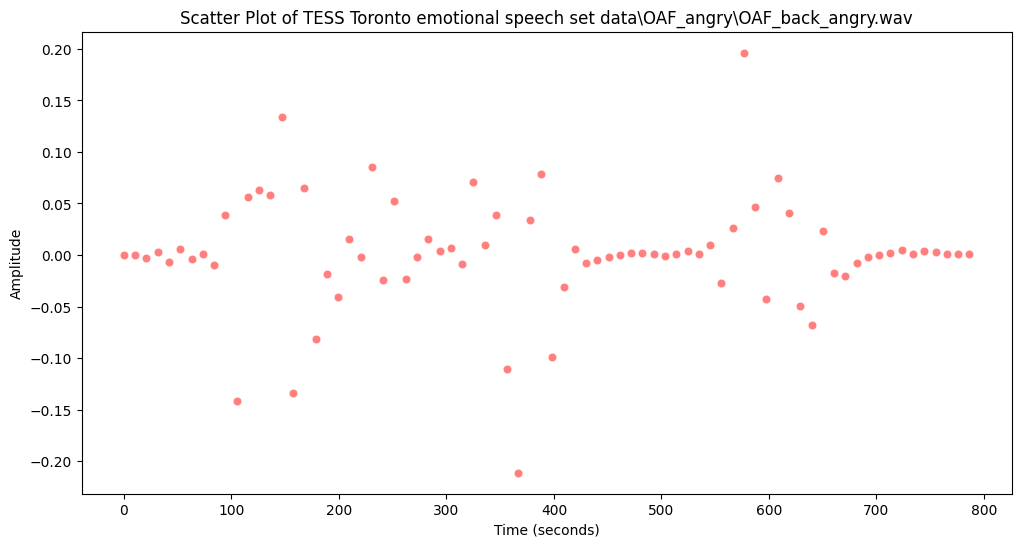

In [24]:
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = df["speech"].iloc[0]  
y, sr = librosa.load(file_path, sr=None)
time = librosa.times_like(y, sr=sr) 
df_wave = pd.DataFrame({"time": time[::500], "amplitude": y[::500]}) 

# Scatter Plot (Time vs. Amplitude)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_wave, x="time", y="amplitude", color="red", alpha=0.5)
plt.title(f"Scatter Plot of {file_path.split('/')[-1]}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


### Distributions

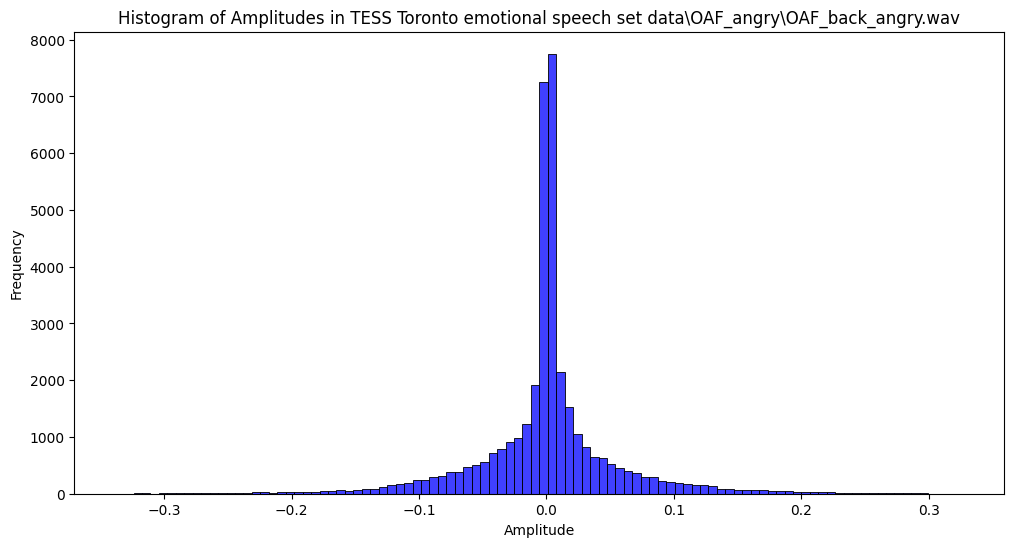

In [25]:
file_path = df["speech"].iloc[0] 
y, sr = librosa.load(file_path, sr=None)

# Histogram of Amplitude Values
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=100, kde=False, color="blue")
plt.title(f"Histogram of Amplitudes in {file_path.split('/')[-1]}")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

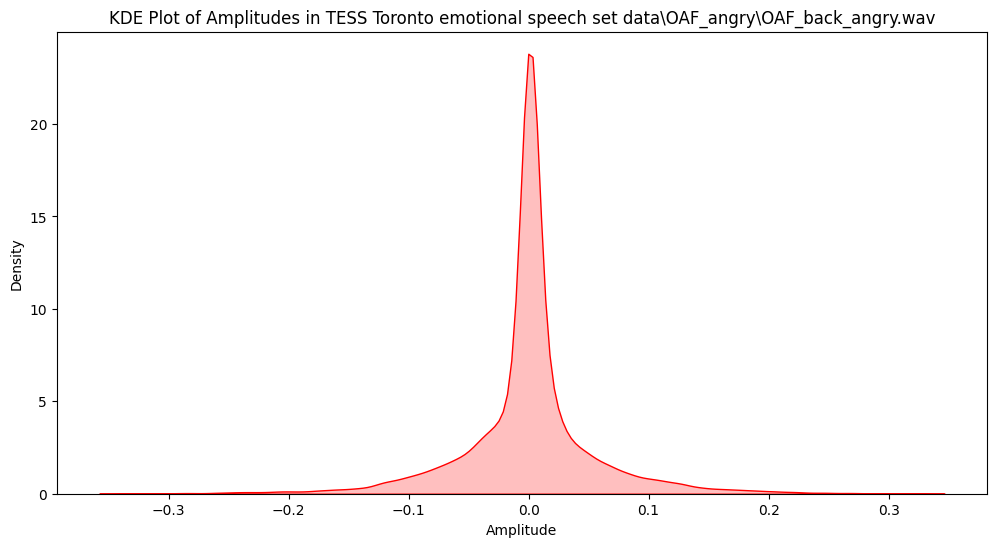

In [26]:
# KDE Plot of Amplitude Values

plt.figure(figsize=(12, 6))
sns.kdeplot(y, shade=True, color="red")
plt.title(f"KDE Plot of Amplitudes in {file_path.split('/')[-1]}")
plt.xlabel("Amplitude")
plt.ylabel("Density")
plt.show()


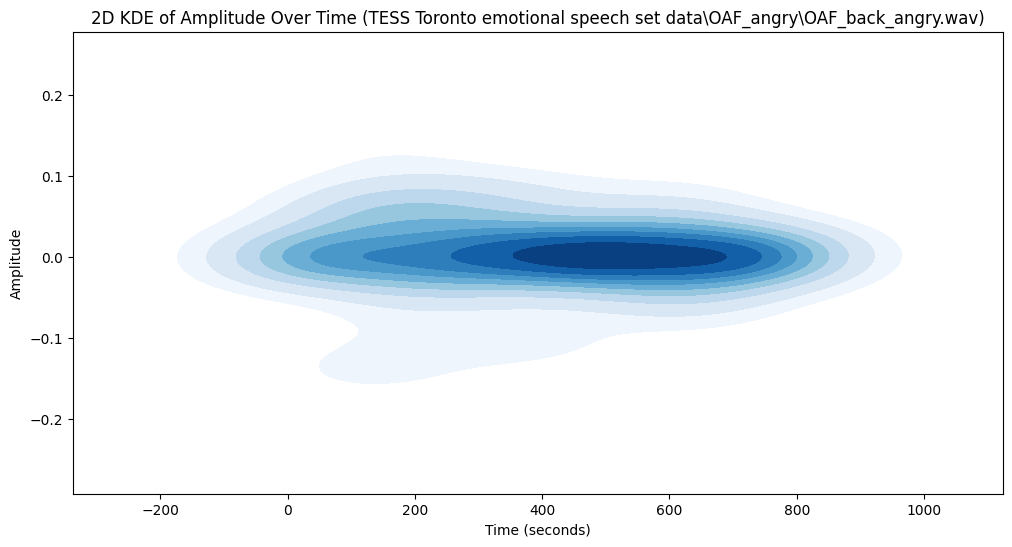

In [27]:
time = librosa.times_like(y, sr=sr) 

# 2D KDE Plot (Time vs. Amplitude)
plt.figure(figsize=(12, 6))
sns.kdeplot(x=time[::500], y=y[::500], cmap="Blues", fill=True, thresh=0.1)
plt.title(f"2D KDE of Amplitude Over Time ({file_path.split('/')[-1]})")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

### Choosing Plot Types and Custom Styles


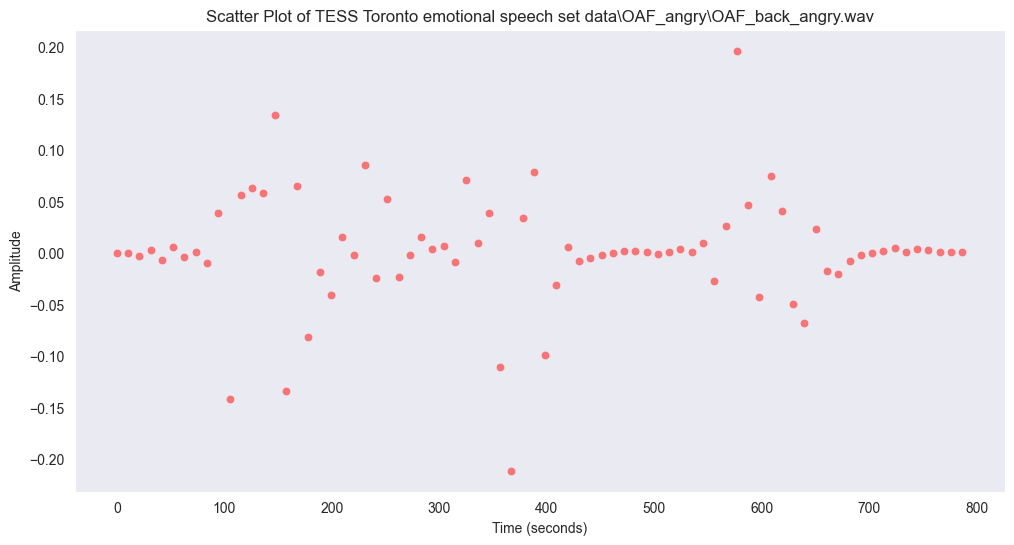

In [28]:
sns.set_style("dark")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_wave, x="time", y="amplitude", color="red", alpha=0.5)
plt.title(f"Scatter Plot of {file_path.split('/')[-1]}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

### Q2. 
1. For the project that you have undertaken, identify a dimensionality reduction problem 
and report the error in reconstruction (with one and two principal components). 
2. Also, try LDA for the dimensionality reduction

#### ANS:
The Mel-Frequency Cepstral Coefficients or in short mfcc are a set of coefficients that represent the spectral characteristics of an audio signal, derived from the Mel Spectrogram. Since its an array of charecters it can reduced to lower dimension by using either simpler methods like taking mean or variance or by using other methods like pca, lda, umap etc.

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_mfcc = np.array(df['mfcc'].tolist())  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mfcc)

def compute_reconstruction_error(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca) 

    mse = np.mean((X - X_reconstructed) ** 2)
    return mse

mse_1 = compute_reconstruction_error(X_scaled, 1)  # Using 1 principal component
mse_2 = compute_reconstruction_error(X_scaled, 2)  # Using 2 principal components

print(f"Reconstruction Error (1 component): {mse_1:.5f}")
print(f"Reconstruction Error (2 components): {mse_2:.5f}")


Reconstruction Error (1 component): 0.62042
Reconstruction Error (2 components): 0.45137


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(df['label'])

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_labels)

df_lda = pd.DataFrame(X_lda, columns=["LDA_1", "LDA_2"])
df = pd.concat([df, df_lda], axis=1)

print(df.head()) 


                                              speech  label  \
0  ../../dataset/archive/TESS Toronto emotional s...  angry   
1  ../../dataset/archive/TESS Toronto emotional s...  angry   
2  ../../dataset/archive/TESS Toronto emotional s...  angry   
3  ../../dataset/archive/TESS Toronto emotional s...  angry   
4  ../../dataset/archive/TESS Toronto emotional s...  angry   

                                                mfcc     LDA_1     LDA_2  
0  [-390.03134, 55.23597, -15.03465, -10.704582, ... -2.389107 -1.784898  
1  [-451.01947, 67.04883, -0.44825765, -16.81213,... -1.117853 -1.932096  
2  [-406.56332, 28.609005, -5.3172164, 2.124631, ... -2.732071 -0.397837  
3  [-386.34003, 53.439655, -8.663545, -13.309978,... -2.699012 -1.753967  
4  [-404.78488, 54.462566, 3.3552904, 10.96758, 2... -2.936682 -0.124494  


### Q3
Generate a toy Dataset: (x, y) : (-1,-1),(-2,-2),(-2,-1),(-1,2), (1,2),(2,1),(1,1),(2,2) . Fit the 
best regression line and compute the MSE on the training set. Also compute the R^2 
matric for the fitted line and the adjusted R^2 metric by considering 1st and then both 
features together

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

X_points = np.array([[-1, -1], [-2, -2], [-2, -1], [-1, 2], 
                     [1, 2], [2, 1], [1, 1], [2, 2]])

data = pd.DataFrame(X_points, columns=["data", "target"])

X = data[["data"]]
X['inter'] = 1
Y = data["target"]        

model = LinearRegression()
model.fit(X, Y)

m1 = model.coef_[0]     # Slope
m2 = model.coef_[1]
c = model.intercept_   # Intercept

print(f"Learned slope (m): {m1:.4f}")
print(f"Learned intercept (c): {c:.4f}")

Learned slope (m): 0.7000
Learned intercept (c): 0.5000


In [32]:
X2 = np.array([[-1, 1], [-2, 1], [-2, 1], [-1, 1], [1, 1], [2, 1], [1, 1], [2, 1]]) 
X1 = np.array([-1, -2, -2, -1, 1, 2, 1, 2]).reshape(-1, 1)
Y = np.array([-1, -2, -1, 2, 2,  1,  1,  2])  

Q2 = np.linalg.inv(X2.T @ X2) @ X2.T @ Y
print(f" 2 features: {Q2}") 

Q1 = np.linalg.inv(X1.T @ X1) @ X1.T @ Y
print(f" 1 features: {Q1}\n") 

def mse(yg,yt):
    mse = 0
    diff = yg-yt
    for i in diff:
        mse += i**2
    mse *= 1/8
    return mse
    
ymean = np.full_like(Y, Y.mean(), dtype=float)

base2 = mse(Y,ymean)
mine2 = mse(Y,X2 @ Q2)
r2_2 = 1 - mine2/base2
r2_adj_2 = 1 - (( 1 - r2_2) * 8 )/ (8 - 2 -1)
base1 = mse(Y,ymean)
mine1 = mse(Y,X1 @ Q1)
r2_1 = 1 - mine1/base1
r2_adj_1 = 1 - (( 1 - r2_1) * 8 )/ (8 -1 -1)

print(f"R2 score with one feature (m) : {r2_1:.4f}")
print(f"R2 score with two features (m,c) : {r2_2:.4f}")
print(f"Adjusted R2 with one feature (m) : {r2_adj_1:.4f}")
print(f"Adjusted R2 with two features (m,c) : {r2_adj_2:.4f}")

 2 features: [0.7 0.5]
 1 features: [0.7]

R2 score with one feature (m) : 0.4333
R2 score with two features (m,c) : 0.5444
Adjusted R2 with one feature (m) : 0.2444
Adjusted R2 with two features (m,c) : 0.2711


### Q4

What do you mean by training a Bayes classifier? Assume that first four samples belongs 
to category A and last 4 samples belongs to category B. If the features follow normal 
distribution, find and plot the decision boundary along with the data points?
a. Compute precision, recall, F measure and accuracy (with the data used for 
training)
b. Why is the Bayes classifier considered a generative classifier? 

#### Ans
Training a Bayes Classifier means estimating the probability distribution of features for each class and using Bayes’ Theorem to classify new points based on these probabilities.
The Bayes classifier (like Naïve Bayes) is considered a generative classifier because it learns the joint probability distribution of the input features 
𝑋 and labels 𝑦, rather than just learning a decision boundary.



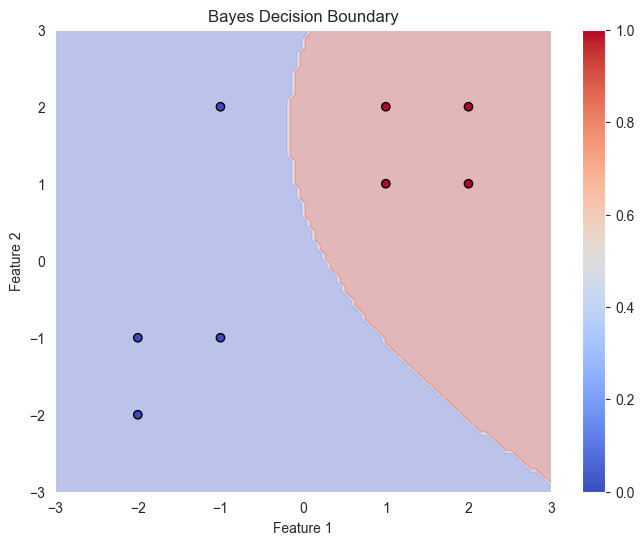

In [33]:
from sklearn.naive_bayes import GaussianNB

X = np.array([[-1, -1], [-2, -2], [-2, -1], [-1, 2], 
              [1, 2], [2, 1], [1, 1], [2, 2]])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

gnb = GaussianNB()
gnb.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Bayes Decision Boundary")
plt.colorbar()
plt.show()


### Q5
If your project is a classification problem, 
a. perform logistic regression, and Bayes classifier and report results
b. confusion matrix, precision, recall, F Measure and AUC/ROC

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

X = np.vstack(df['mfcc'].values)
y = np.array(df['label'])
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [35]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)

y_pred_log_reg = log_reg.predict(X_test_pca)
y_pred_nb = nb_classifier.predict(X_test_pca)

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("Naïve Bayes Report:\n", classification_report(y_test, y_pred_nb))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       160
           1       0.81      0.82      0.82       160
           2       0.84      0.88      0.86       160
           3       0.78      0.74      0.76       160
           4       0.76      0.76      0.76       160
           5       0.69      0.67      0.68       160
           6       0.81      0.82      0.81       160

    accuracy                           0.78      1120
   macro avg       0.78      0.78      0.78      1120
weighted avg       0.78      0.78      0.78      1120

Naïve Bayes Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       160
           1       0.84      0.81      0.82       160
           2       0.89      0.84      0.87       160
           3       0.75      0.76      0.75       160
           4       0.75      0.74      0.75       160
           5       0.70     

In [38]:
import joblib

# Save the trained models
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [44]:
log_reg = joblib.load("logistic_regression_model.pkl")
import librosa

def predict_emotion(audio_path, model):
    y, sr = librosa.load(audio_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1).reshape(1, -1)

    # Apply the same preprocessing
    mfcc_scaled = scaler.transform(mfcc_mean)
    mfcc_pca = pca.transform(mfcc_scaled)

    # Predict using the chosen model
    predicted_label = model.predict(mfcc_pca)
    emotion = label_encoder.inverse_transform(predicted_label)[0]
    
    return emotion

# Example usage
audio_file = "sample.mp3"
predicted_emotion = predict_emotion(audio_file, log_reg)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: sad


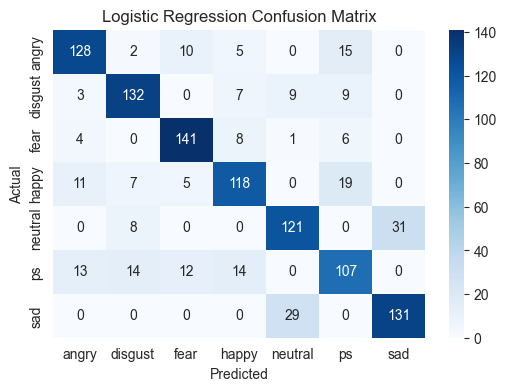

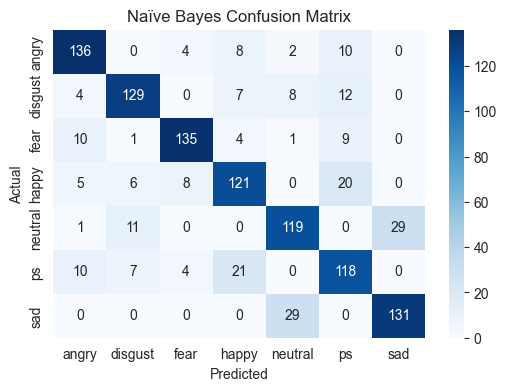

In [36]:
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_conf_matrix(conf_matrix_log_reg, "Logistic Regression Confusion Matrix")
plot_conf_matrix(conf_matrix_nb, "Naïve Bayes Confusion Matrix")


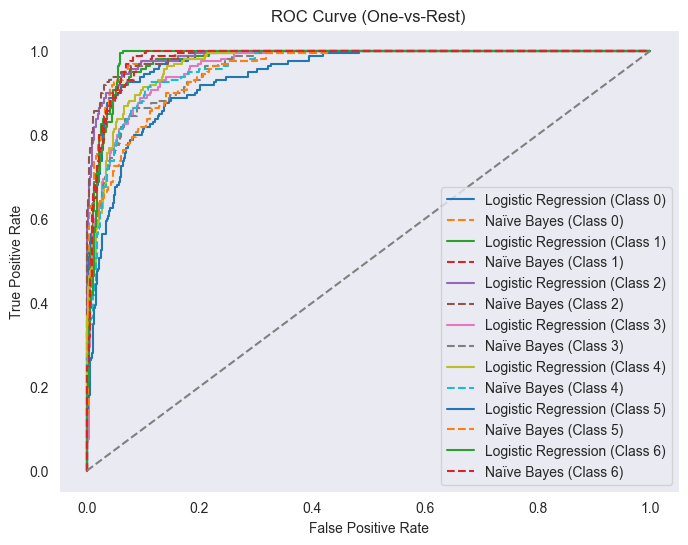

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_log_reg = log_reg.predict_proba(X_test_pca)
y_prob_nb = nb_classifier.predict_proba(X_test_pca)

auc_log_reg = roc_auc_score(y_test, y_prob_log_reg, multi_class='ovr')
auc_nb = roc_auc_score(y_test, y_prob_nb, multi_class='ovr')

plt.figure(figsize=(8, 6))
for i in range(y_prob_log_reg.shape[1]):  
    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test == i, y_prob_log_reg[:, i])
    fpr_nb, tpr_nb, _ = roc_curve(y_test == i, y_prob_nb[:, i])

    plt.plot(fpr_log_reg, tpr_log_reg, label=f"Logistic Regression (Class {i})")
    plt.plot(fpr_nb, tpr_nb, label=f"Naïve Bayes (Class {i})", linestyle='dashed')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()


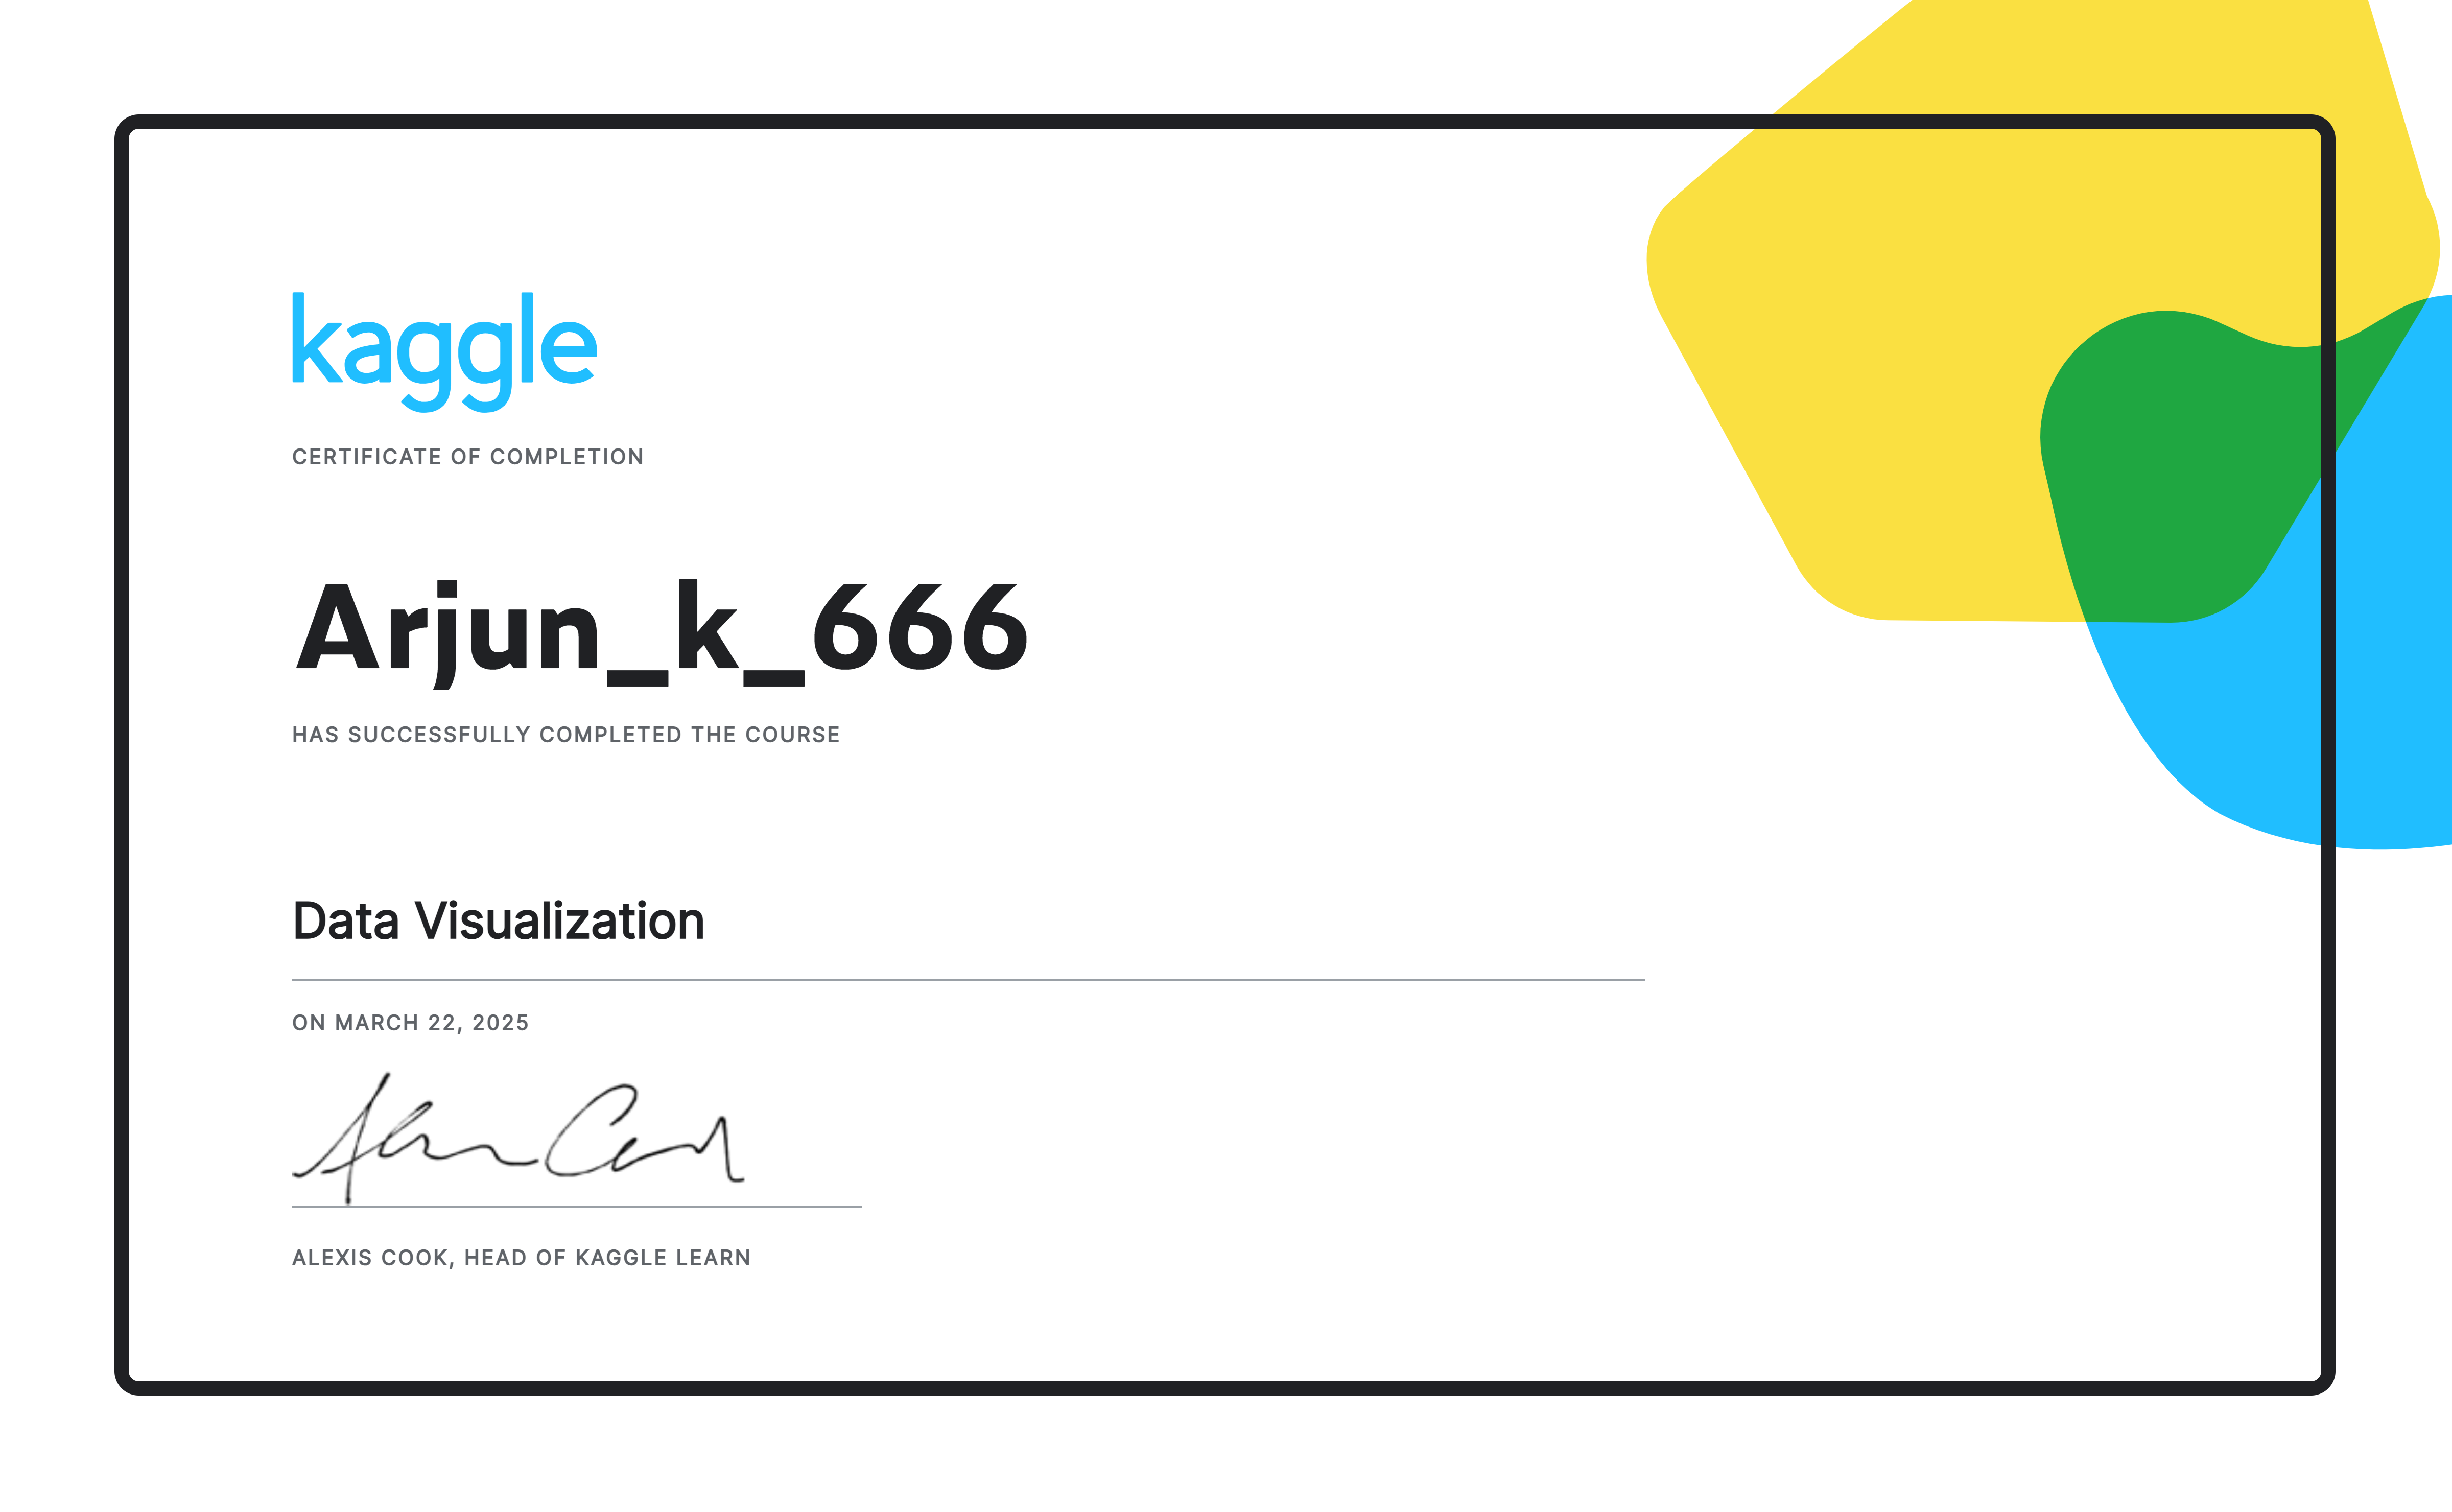